import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Read data and show head and describe it


In [2]:

dataset = pd.read_csv(r"D:\40 project data sets\1\DailyDelhiClimateTrain.csv") 
# pandas read csv function is used to read the csv file
print(dataset.head())  
print(dataset.tail())
print(dataset.describe())


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
            date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231

In [3]:
print(dataset.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [4]:
figure = px.line(dataset, x="date",  y="meantemp",  title='Mean Temperature in Delhi Over the Years')
figure.show()

In [5]:
figure= px.line(dataset, x='date' , y ="humidity", title="Humidity in delhi over tehe years")
figure.show()

In [6]:
figure= px.line(dataset, x='date', y ="wind_speed", title="Windspeed in delhi over tehe years")
figure.show()

The relation between temperature and the humidity:

In [12]:
# # Install the statsmodels package
# %pip install statsmodels
# Inverse relationship between temperature and humidity
figure=px.scatter(data_frame= dataset, x='humidity',
                    y='meantemp',
                    size= 'meantemp',# حجم النقاط يعتمد على درجة الحرارة
                    trendline='ols',
                    # إضافة انحدار خطي (OLS Regression) لإظهار الاتجاه العام للبيانات.
                    title='Relation between Humidity and Mean Temperature')
figure.show()

In [8]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
# pd.to_datetime() → بتحول القيم النصية (Strings) في عمود date إلى كائنات زمنية (Datetime).
# تحويل العمود إلى تاريخ ووقت عشان نطبق عليه الفورمات
# date[column] = pd.to_datetime(date[column],format='%Y-%m-%d')

# إضافة عمود جديد يحتوي على السنة
dataset['year']=dataset['date'].dt.year
# data['date'].dt.year → بيستخدم .dt.year لاستخراج السنة من كل تاريخ في العمود date وحفظها في عمود جديد اسمه year.
# إضافة عمود جديد يحتوي على الشهر
dataset['month']=dataset['date'].dt.month
dataset.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


Temperature changes along years

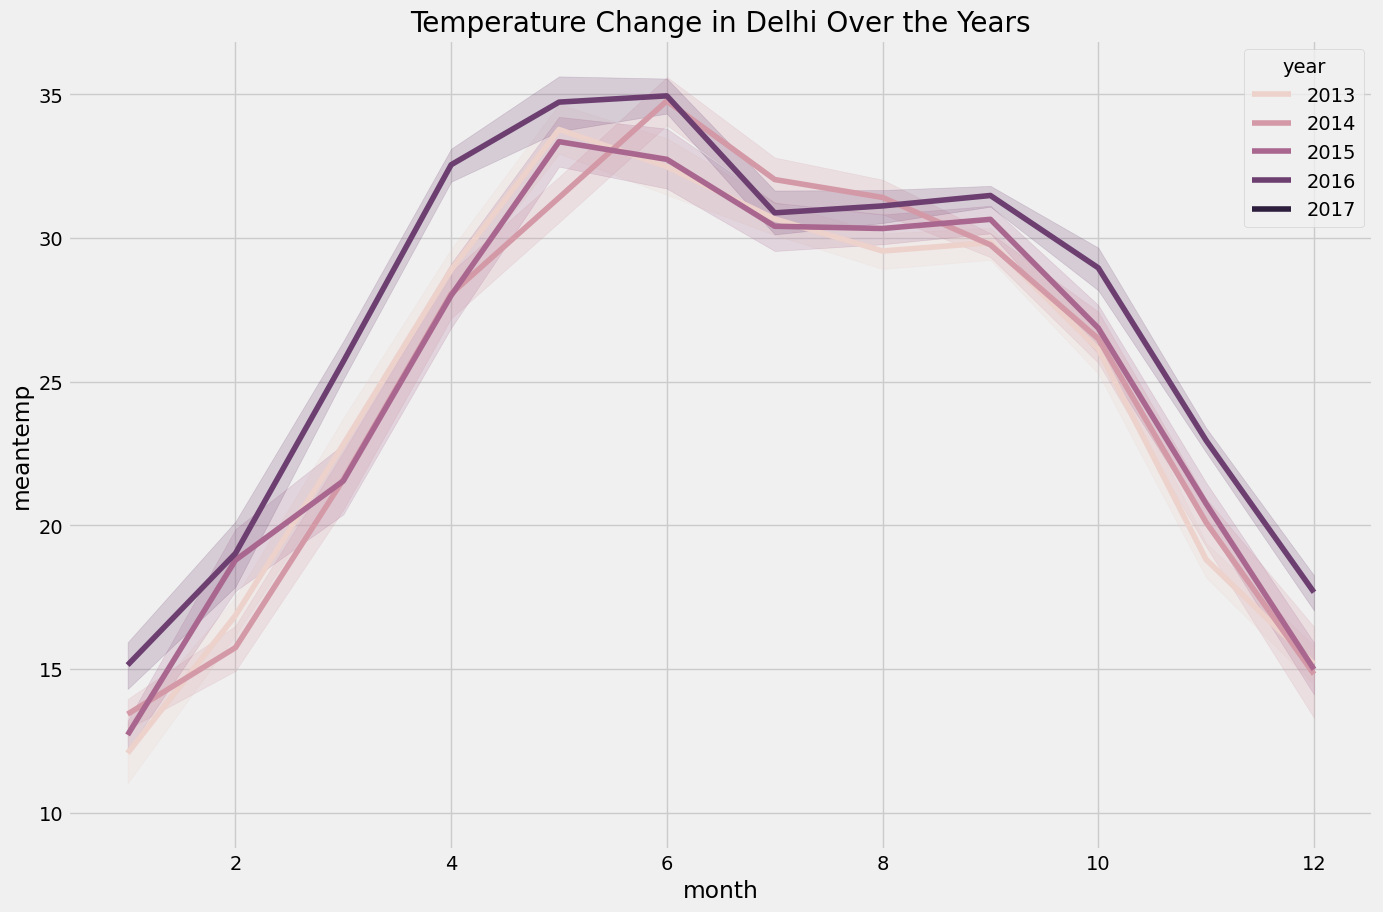

In [9]:
plt.style.use('fivethirtyeight')
# plt.style.use('fivethirtyeight') → يغير تصميم المخطط ليشبه المخططات المستخدمة في موقع FiveThirtyEight الشهير، وهو تصميم حديث وبسيط.
# يمكنك تجربة أنماط أخرى مثل "ggplot" أو "seaborn-darkgrid".
plt.figure(figsize=(15,10))
# عرض 15 وارتفاع 10 بوصات،
plt.title('Temperature Change in Delhi Over the Years')
sns.lineplot(data=dataset,
             x='month',
             y='meantemp',
             hue='year')
plt.show()

In [10]:
# هنحمل مكتبة prophet
# بيقولك المكتبة جي بتقبل بيانات الوقت "ds", والتسميات "y"
forecast_data=dataset.rename(columns={'date':'ds','meantemp':'y'})
# to rename the columns in the dataset we use dictionary
print(forecast_data.head())

          ds          y   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


Use facebook prophet to predict wheather

In [11]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

c:\Users\HDTECH\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

04:01:58 - cmdstanpy - INFO - Chain [1] start processing
04:01:59 - cmdstanpy - INFO - Chain [1] done processing
